In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
books=pd.read_csv('BX-Books.csv',sep=';',error_bad_lines=False, encoding='latin-1')
#Rename the columns for easier merge
books.columns=['isbn','booktitle','bookauthor','yearofpublication','publiser','imageurls','imageurlm','imageurll']
books.head()

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3

,isbn,booktitle,bookauthor,yearofpublication,publiser,imageurls,imageurlm,imageurll
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [3]:
users=pd.read_csv('BX-Users.csv',sep=';',error_bad_lines=False, encoding='latin-1')
users.columns=['userid','location','age']
users.head()

,userid,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [4]:
ratings=pd.read_csv('BX-Book-Ratings.csv',sep=';',error_bad_lines=False, encoding='latin-1')
ratings.columns=['userid','isbn','bookrating']
ratings.head()

,userid,isbn,bookrating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
print(ratings.shape)
print(list(ratings.columns))

(1149780, 3)
['userid', 'isbn', 'bookrating']


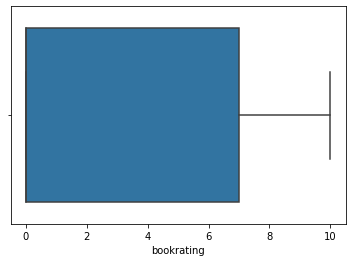

In [6]:
import seaborn as sns
sns.boxplot(ratings['bookrating'])

---
## EDA
---

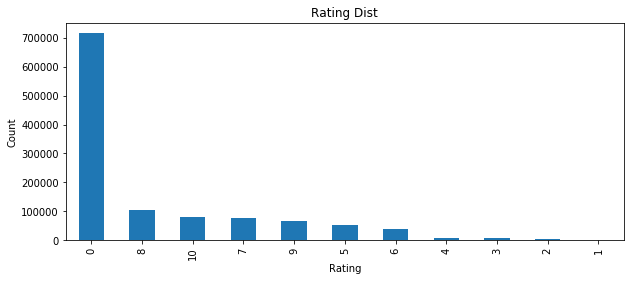

In [7]:
plt.figure(figsize=(10,4))
ratings.bookrating.value_counts(sort=True).plot(kind='bar')
plt.title('Rating Dist')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [8]:
users.describe()

,userid,age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


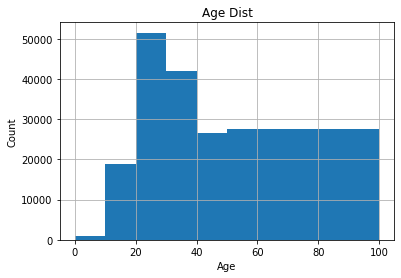

In [9]:
users.age.hist(bins=[0,10,20,30,40,50,100])
plt.title('Age Dist')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

---
## Recommendation based on rating counts
---

In [10]:
rating_counts=pd.DataFrame(ratings.groupby('isbn')['bookrating'].count())
rating_counts.columns=['ratingcounts']
rating_counts.sort_values('ratingcounts',ascending=False).head()

,ratingcounts
isbn,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723


In [11]:
books_summary=pd.merge(books,ratings,on='isbn')
books_summary.head()

,isbn,booktitle,bookauthor,yearofpublication,publiser,imageurls,imageurlm,imageurll,userid,bookrating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


In [12]:
# Find out what the most rated books are
most_rated_books=pd.DataFrame(['0971880107','0316666343','0385504209','0060928336','0312195516'],index=np.arange(5),columns=['isbn'])
most_rated_books

,isbn
0,0971880107
1,0316666343
2,0385504209
3,0060928336
4,0312195516


In [13]:
most_rated_books_summary=pd.merge(most_rated_books,books,on='isbn')

In [14]:
most_rated_books_summary

,isbn,booktitle,bookauthor,yearofpublication,publiser,imageurls,imageurlm,imageurll
0,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
2,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
3,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
4,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...


---
## Recommendations based on correlations
---

In [15]:
# Find the average rating for each book
average_rating=pd.DataFrame(ratings.groupby('isbn')['bookrating'].mean())
average_rating.columns=['averagerating']
average_rating.head()

,averagerating
isbn,
0330299891,3.0
0375404120,1.5
0586045007,0.0
9022906116,3.5
9032803328,0.0


In [16]:
average_rating=pd.merge(average_rating,rating_counts,on='isbn')
average_rating.sort_values('ratingcounts',ascending=False).head()

,averagerating,ratingcounts
isbn,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


Observations: The books received the most ratings are not the ones got the highest ratings. So the recommendation system using the most rated method is biased.

### To ensure statistical significance, users with less than 200 ratings and books with less than 100 ratings are excluded

In [23]:
counts_user= books_summary['userid'].value_counts()
counts_user.head()

11676     11144
198711     6456
153662     5814
98391      5779
35859      5646
Name: userid, dtype: int64

In [27]:
books_summary = books_summary[books_summary['userid'].isin(counts_user[counts_user >= 200].index)]

In [28]:
books_summary.head()

,isbn,booktitle,bookauthor,yearofpublication,publiser,imageurls,imageurlm,imageurll,userid,bookrating
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
6,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,85526,0
7,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,96054,0
10,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,177458,0
21,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,110912,10


In [26]:
count_book=books_summary['bookrating'].value_counts()
count_book.head()

0     647294
8      91804
10     71225
7      66402
9      60778
Name: bookrating, dtype: int64

In [29]:
books_summary=books_summary[books_summary['bookrating'].isin(count_book[count_book>100].index)]
books_summary.head()

,isbn,booktitle,bookauthor,yearofpublication,publiser,imageurls,imageurlm,imageurll,userid,bookrating
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
6,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,85526,0
7,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,96054,0
10,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,177458,0
21,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,110912,10


In [35]:
# Create the pivot table
ratingmat=books_summary.pivot_table(index='userid',columns='isbn',values='bookrating')
ratingmat.head()

isbn,0000913154,0001010565,0001046438,000104687X,0001047213,0001047663,0001047868,0001047973,000104799X,0001048082,...,B0001FZGRQ,B0001FZGTO,B0001GDNCK,B0001GMSV2,B0001I1JII,B0001I1KOG,B0001PIOX4,B000234N3A,B000234N76,B000234NC6
userid,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Find the books most similar to "Dark Justice"
bone_rating=ratingmat['0316666343']
similar_to_bone=ratingmat.corrwith(bone_rating)
corr_bone=pd.DataFrame(similar_to_bone,columns=['corr'])
corr_bone.dropna(inplace=True)
corr_bone                     

,corr
isbn,
0002005018,9.614813e-18
0002184974,1.000000e+00
0002250810,1.000000e+00
000225929X,1.000000e+00
0006157629,-1.000000e+00
0006177492,-1.000000e+00
000648302X,-1.000000e+00
0006485936,5.773503e-01
0006492347,-9.840181e-01


In [42]:
corr_summary=corr_bone.join(average_rating['ratingcounts'])
corr_summary[corr_summary['ratingcounts']>300].sort_values('corr',ascending=False).head(10)

,corr,ratingcounts
isbn,,
0316666343,1.000000,1295
0312291639,0.471872,354
0316601950,0.431408,568
0446610038,0.429712,391
0446672211,0.417742,585
0385265700,0.351635,319
0345342968,0.316922,321
0060930535,0.309860,494
0375707972,0.308145,354


In [45]:
# Find the title of the books
books_corr_to_bones=pd.DataFrame(['0312291639', '0316601950', '0446610038', '0446672211', '0385265700', '0345342968', '0060930535', '0375707972', '0671021001'],index=np.arange(9),columns=['isbn'])
books_corr_to_bones

,isbn
0,0312291639
1,0316601950
2,0446610038
3,0446672211
4,0385265700
5,0345342968
6,0060930535
7,0375707972
8,0671021001


In [47]:
corr_books=pd.merge(books_corr_to_bones,books,on='isbn')
corr_books

,isbn,booktitle,bookauthor,yearofpublication,publiser,imageurls,imageurlm,imageurll
0,0312291639,The Nanny Diaries: A Novel,Emma McLaughlin,2003,St. Martin's Griffin,http://images.amazon.com/images/P/0312291639.0...,http://images.amazon.com/images/P/0312291639.0...,http://images.amazon.com/images/P/0312291639.0...
1,0316601950,The Pilot's Wife : A Novel,Anita Shreve,1999,Back Bay Books,http://images.amazon.com/images/P/0316601950.0...,http://images.amazon.com/images/P/0316601950.0...,http://images.amazon.com/images/P/0316601950.0...
2,0446610038,1st to Die: A Novel,James Patterson,2002,Warner Vision,http://images.amazon.com/images/P/0446610038.0...,http://images.amazon.com/images/P/0446610038.0...,http://images.amazon.com/images/P/0446610038.0...
3,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...
4,0385265700,The Book of Ruth (Oprah's Book Club (Paperback)),Jane Hamilton,1990,Anchor,http://images.amazon.com/images/P/0385265700.0...,http://images.amazon.com/images/P/0385265700.0...,http://images.amazon.com/images/P/0385265700.0...
5,0345342968,Fahrenheit 451,RAY BRADBURY,1987,Del Rey,http://images.amazon.com/images/P/0345342968.0...,http://images.amazon.com/images/P/0345342968.0...,http://images.amazon.com/images/P/0345342968.0...
6,0060930535,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...
7,0375707972,The Reader,Bernhard Schlink,1999,Vintage Books USA,http://images.amazon.com/images/P/0375707972.0...,http://images.amazon.com/images/P/0375707972.0...,http://images.amazon.com/images/P/0375707972.0...
8,0671021001,She's Come Undone (Oprah's Book Club),Wally Lamb,1998,Pocket,http://images.amazon.com/images/P/0671021001.0...,http://images.amazon.com/images/P/0671021001.0...,http://images.amazon.com/images/P/0671021001.0...


---
## Recommendations based on KNN
---

In [49]:
books_summary.head()

,isbn,booktitle,bookauthor,yearofpublication,publiser,imageurls,imageurlm,imageurll,userid,bookrating
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
6,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,85526,0
7,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,96054,0
10,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,177458,0
21,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,110912,10


In [51]:
columns=['bookauthor','yearofpublication','publiser','imageurls','imageurlm','imageurll']
books_summary=books_summary.drop(columns,axis=1)
books_summary.head()

,isbn,booktitle,userid,bookrating
3,0002005018,Clara Callan,11676,8
6,0002005018,Clara Callan,85526,0
7,0002005018,Clara Callan,96054,0
10,0002005018,Clara Callan,177458,0
21,0374157065,Flu: The Story of the Great Influenza Pandemic...,110912,10


In [52]:
book_rating_counts=pd.DataFrame(books_summary.groupby('booktitle')['bookrating'].count())
book_rating_counts.columns=['totalratingcounts']
book_rating_counts.sort_values('totalratingcounts',ascending=False).head()

,totalratingcounts
booktitle,
Wild Animus,332
Bridget Jones's Diary,264
The Lovely Bones: A Novel,263
The Notebook,239
The Pelican Brief,230


In [54]:
books_summary_with_total_ratingcount=pd.merge(books_summary,book_rating_counts,on='booktitle')
books_summary_with_total_ratingcount.head(10)

,isbn,booktitle,userid,bookrating,totalratingcounts
0,0002005018,Clara Callan,11676,8,4
1,0002005018,Clara Callan,85526,0,4
2,0002005018,Clara Callan,96054,0,4
3,0002005018,Clara Callan,177458,0,4
4,0374157065,Flu: The Story of the Great Influenza Pandemic...,110912,10,3
5,0374157065,Flu: The Story of the Great Influenza Pandemic...,137688,0,3
6,0374157065,Flu: The Story of the Great Influenza Pandemic...,197659,9,3
7,0399135782,The Kitchen God's Wife,11676,9,109
8,0399135782,The Kitchen God's Wife,36836,0,109
9,0399135782,The Kitchen God's Wife,46398,9,109


In [57]:
books_pop=books_summary_with_total_ratingcount[books_summary_with_total_ratingcount['totalratingcounts']>50].sort_values('totalratingcounts',ascending=False)
books_pop.head()

,isbn,booktitle,userid,bookrating,totalratingcounts
393,0971880107,Wild Animus,6543,0,332
493,0971880107,Wild Animus,87143,0,332
495,0971880107,Wild Animus,87746,0,332
496,0971880107,Wild Animus,88283,0,332
497,0971880107,Wild Animus,88693,4,332


In [59]:
books_pop.shape

(57623, 5)

In [63]:
# Filter to users in US and CA only
combined=pd.merge(books_pop,users,on='userid')
combined.head()

,isbn,booktitle,userid,bookrating,totalratingcounts,location,age
0,0971880107,Wild Animus,6543,0,332,"strafford, missouri, usa",34.0
1,014028009X,Bridget Jones's Diary,6543,0,264,"strafford, missouri, usa",34.0
2,0316666343,The Lovely Bones: A Novel,6543,0,263,"strafford, missouri, usa",34.0
3,0312278586,The Nanny Diaries: A Novel,6543,0,223,"strafford, missouri, usa",34.0
4,0385504209,The Da Vinci Code,6543,0,217,"strafford, missouri, usa",34.0


In [64]:
us_ca_user_rating=combined[combined['location'].str.contains('usa|canada')]
us_ca_user_rating=us_ca_user_rating.drop('age',axis=1)
us_ca_user_rating.head()

,isbn,booktitle,userid,bookrating,totalratingcounts,location
0,0971880107,Wild Animus,6543,0,332,"strafford, missouri, usa"
1,014028009X,Bridget Jones's Diary,6543,0,264,"strafford, missouri, usa"
2,0316666343,The Lovely Bones: A Novel,6543,0,263,"strafford, missouri, usa"
3,0312278586,The Nanny Diaries: A Novel,6543,0,223,"strafford, missouri, usa"
4,0385504209,The Da Vinci Code,6543,0,217,"strafford, missouri, usa"


In [65]:
us_ca_user_rating.shape

(52947, 6)

In [67]:
# Implement KNN
from scipy.sparse import csr_matrix
us_ca_rating_table=us_ca_user_rating.pivot_table(index='booktitle',columns='userid',values='bookrating').fillna(0)
us_ca_rating_mat=csr_matrix(us_ca_rating_table.values)

In [68]:
from sklearn.neighbors import NearestNeighbors
model_knn=NearestNeighbors(metric='cosine',algorithm='brute')
model_knn.fit(us_ca_rating_mat)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [69]:
# Randomly choose one book as the target
query_index=np.random.choice(us_ca_rating_table.shape[0])
print(query_index)

336


In [70]:
distances,indices=model_knn.kneighbors(us_ca_rating_table.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)

In [71]:
# Find out the book title of the book we randomly choose
us_ca_rating_table.index[query_index]

'Needful Things'

In [73]:
for i in range(0,len(distances.flatten())):
    if i==0:
        print('Recommendations for {0}:\n'.format(us_ca_rating_table.index[query_index]))
    else:
        print('{0}:{1},with distance of {2}:'.format(i,us_ca_rating_table.index[indices.flatten()[i]],distances.flatten()[i]))

Recommendations for Needful Things:

1:Pet Sematary,with distance of 0.5929778951324509:
2:Christine,with distance of 0.6633029667677964:
3:Insomnia,with distance of 0.6731958886687639:
4:Gerald's Game,with distance of 0.6886998499235023:
5:The Tommyknockers,with distance of 0.7079294744949575:
